# Peter a vlk: Úvod do posilňovacieho učenia

V tomto návode sa naučíme, ako aplikovať posilňovacie učenie na problém hľadania cesty. Prostredie je inšpirované hudobnou rozprávkou [Peter a vlk](https://en.wikipedia.org/wiki/Peter_and_the_Wolf) od ruského skladateľa [Sergeja Prokofieva](https://en.wikipedia.org/wiki/Sergei_Prokofiev). Je to príbeh o mladom pionierovi Petrovi, ktorý odvážne opustí svoj dom a vydá sa na lesnú čistinu, aby prenasledoval vlka. Vytrénujeme algoritmy strojového učenia, ktoré Petrovi pomôžu preskúmať okolitú oblasť a vytvoriť optimálnu navigačnú mapu.

Najskôr si importujeme niekoľko užitočných knižníc:


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## Prehľad posilňovacieho učenia

**Posilňovacie učenie** (RL) je technika učenia, ktorá nám umožňuje naučiť sa optimálne správanie **agenta** v určitom **prostredí** prostredníctvom vykonávania mnohých experimentov. Agent v tomto prostredí by mal mať nejaký **cieľ**, definovaný pomocou **funkcie odmeny**.

## Prostredie

Pre jednoduchosť si predstavme Petrov svet ako štvorcovú dosku veľkosti `width` x `height`. Každé pole na tejto doske môže byť:
* **zem**, po ktorej Peter a ostatné bytosti môžu chodiť
* **voda**, po ktorej, samozrejme, nemôžete chodiť
* **strom** alebo **tráva** - miesto, kde si môžete oddýchnuť
* **jablko**, ktoré predstavuje niečo, čo by Peter rád našiel, aby sa nakŕmil
* **vlk**, ktorý je nebezpečný a treba sa mu vyhnúť

Na prácu s prostredím definujeme triedu s názvom `Board`. Aby sme tento notebook príliš nezahltili, presunuli sme všetok kód na prácu s doskou do samostatného modulu `rlboard`, ktorý teraz importujeme. Môžete sa pozrieť do tohto modulu, aby ste získali viac podrobností o interných mechanizmoch implementácie.


Poďme teraz vytvoriť náhodnú dosku a pozrieť sa, ako vyzerá:


In [4]:
# code block 1

## Akcie a Politika

V našom príklade by Peterovým cieľom bolo nájsť jablko, pričom by sa mal vyhnúť vlkovi a iným prekážkam. Definujte tieto akcie ako slovník a priraďte ich k dvojiciam zodpovedajúcich zmien súradníc.


In [5]:
# code block 2

Strategia nášho agenta (Peter) je definovaná takzvanou **politikou**. Pozrime sa na najjednoduchšiu politiku nazývanú **náhodná prechádzka**.

## Náhodná prechádzka

Najprv vyriešme náš problém implementáciou stratégie náhodnej prechádzky.


In [ ]:
# Let's run a random walk experiment several times and see the average number of steps taken: code block 3

In [7]:
# code block 4

## Funkcia odmeny

Aby sme našu politiku urobili inteligentnejšou, musíme pochopiť, ktoré ťahy sú „lepšie“ ako ostatné.


In [8]:
#code block 5

## Q-Learning

Vytvorte Q-Tabuľku alebo viacrozmerné pole. Keďže naša hracia plocha má rozmery `width` x `height`, môžeme Q-Tabuľku reprezentovať pomocou numpy poľa s tvarom `width` x `height` x `len(actions)`:


In [9]:
# code block 6

Odošlite Q-Tabuľku do funkcie `plot`, aby ste zobrazili tabuľku na doske:


In [10]:
m.plot(Q)

NameError: name 'm' is not defined

## Podstata Q-Learning: Bellmanova rovnica a učebný algoritmus

Napíšte pseudokód pre náš učebný algoritmus:

* Inicializujte Q-Tabuľku Q rovnakými hodnotami pre všetky stavy a akcie
* Nastavte rýchlosť učenia $\alpha\leftarrow 1$
* Opakujte simuláciu mnohokrát
   1. Začnite na náhodnej pozícii
   1. Opakujte
        1. Vyberte akciu $a$ v stave $s$
        2. Vykonajte akciu presunutím sa do nového stavu $s'$
        3. Ak narazíme na podmienku konca hry alebo je celková odmena príliš malá - ukončite simuláciu  
        4. Vypočítajte odmenu $r$ v novom stave
        5. Aktualizujte Q-Funkciu podľa Bellmanovej rovnice: $Q(s,a)\leftarrow (1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$
        6. $s\leftarrow s'$
        7. Aktualizujte celkovú odmenu a znížte $\alpha$.

## Využívanie vs. Preskúmavanie

Najlepší prístup je nájsť rovnováhu medzi preskúmavaním a využívaním. Ako sa dozvedáme viac o našom prostredí, budeme pravdepodobne nasledovať optimálnu cestu, avšak občas si zvolíme nepreskúmanú cestu.

## Implementácia v Pythone

Teraz sme pripravení implementovať učebný algoritmus. Predtým však potrebujeme funkciu, ktorá premení ľubovoľné čísla v Q-Tabuľke na vektor pravdepodobností pre zodpovedajúce akcie:


In [10]:
# code block 7

K pôvodnému vektoru pridávame malé množstvo `eps`, aby sme sa vyhli deleniu nulou v počiatočnom prípade, keď sú všetky komponenty vektora identické.

Skutočný učebný algoritmus budeme spúšťať počas 5000 experimentov, tiež nazývaných **epochy**:


In [56]:

from IPython.display import clear_output

lpath = []

# code block 8

Po vykonaní tohto algoritmu by mala byť Q-Tabuľka aktualizovaná hodnotami, ktoré definujú atraktivitu rôznych akcií v každom kroku. Vizualizujte tabuľku tu:


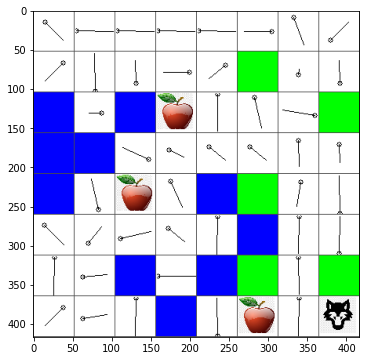

In [43]:
m.plot(Q)

## Kontrola politiky

Keďže Q-Tabuľka uvádza „atraktivitu“ každej akcie v každom stave, je pomerne jednoduché použiť ju na definovanie efektívnej navigácie v našom svete. V najjednoduchšom prípade môžeme jednoducho vybrať akciu, ktorá zodpovedá najvyššej hodnote v Q-Tabuľke:


In [13]:
# code block 9

2

Ak vyskúšate vyššie uvedený kód niekoľkokrát, môžete si všimnúť, že sa niekedy jednoducho "zasekne" a musíte stlačiť tlačidlo STOP v notebooku, aby ste ho prerušili.

> **Úloha 1:** Upraviť funkciu `walk` tak, aby obmedzila maximálnu dĺžku cesty na určitý počet krokov (napríklad 100), a sledovať, ako vyššie uvedený kód občas vráti túto hodnotu.

> **Úloha 2:** Upraviť funkciu `walk` tak, aby sa nevracala na miesta, kde už predtým bola. Tým sa zabráni tomu, aby sa `walk` dostala do slučky, avšak agent sa stále môže ocitnúť "uväznený" na mieste, z ktorého sa nedokáže dostať.


In [58]:

# code block 10

Average path length = 5.31, eaten by wolf: 0 times


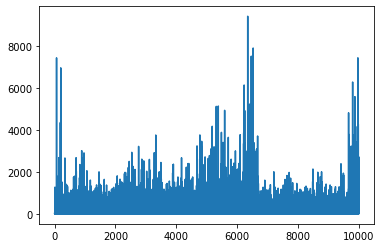

In [57]:
plt.plot(lpath)

## Cvičenie
## Realistickejší svet Petra a vlka



---

**Upozornenie**:  
Tento dokument bol preložený pomocou služby na automatický preklad [Co-op Translator](https://github.com/Azure/co-op-translator). Hoci sa snažíme o presnosť, upozorňujeme, že automatické preklady môžu obsahovať chyby alebo nepresnosti. Za autoritatívny zdroj by sa mal považovať pôvodný dokument v jeho pôvodnom jazyku. Pre dôležité informácie odporúčame profesionálny preklad vykonaný človekom. Nezodpovedáme za žiadne nedorozumenia alebo nesprávne interpretácie vyplývajúce z použitia tohto prekladu.
